In [48]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from scipy.stats import probplot
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing

from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.stattools import adfuller

sns.set_style('darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

In [130]:
df = pd.read_csv('Train_SU63ISt.csv')
df = df.drop('ID', axis= 1)
test = pd.read_csv('Test_0qrQsBZ.csv')
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [51]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format = '%d-%m-%Y %H:%M')
df['hour'] = df.Datetime.dt.hour

In [10]:
from fbprophet import Prophet

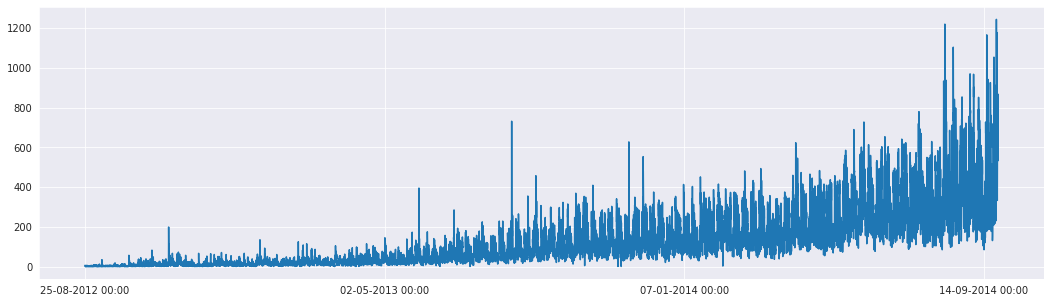

In [42]:
plt.figure(figsize=(18,5))
plt.plot(df)
plt.xticks(df.index[::6000])
plt.show()

In [56]:
df

,Datetime,Count,hour
0,2012-08-25 00:00:00,8,0
1,2012-08-25 01:00:00,2,1
2,2012-08-25 02:00:00,6,2
3,2012-08-25 03:00:00,2,3
4,2012-08-25 04:00:00,2,4
...,...,...,...
18283,2014-09-25 19:00:00,868,19
18284,2014-09-25 20:00:00,732,20
18285,2014-09-25 21:00:00,702,21
18286,2014-09-25 22:00:00,580,22


In [57]:
df.groupby(['hour']).mean()

,Count
hour,
0,147.695538
1,117.868766
2,99.753281
3,82.422572
4,69.375328
5,62.102362
6,66.776903
7,77.443570
8,89.181102


In [61]:
hourly_frac = df.groupby(['hour']).mean()/np.sum(df.groupby(['hour']).mean())

In [63]:
hourly_frac.columns = ['fraction']

In [66]:
df.index = df['Datetime']

In [70]:
df = df.drop(['hour','Datetime'], axis = 1)

In [76]:
df_train = df.resample('D').sum()

In [78]:
df_train['ds'] = df_train.index
df_train['y'] = df_train['Count']
df_train = df_train.drop(['Count'], axis = 1)

In [92]:
m = Prophet(yearly_seasonality=True, seasonality_prior_scale= 0.1, daily_seasonality= False, weekly_seasonality= True)
m.fit(df_train)

In [93]:
future = m.make_future_dataframe(213)
forecast = m.predict(future)

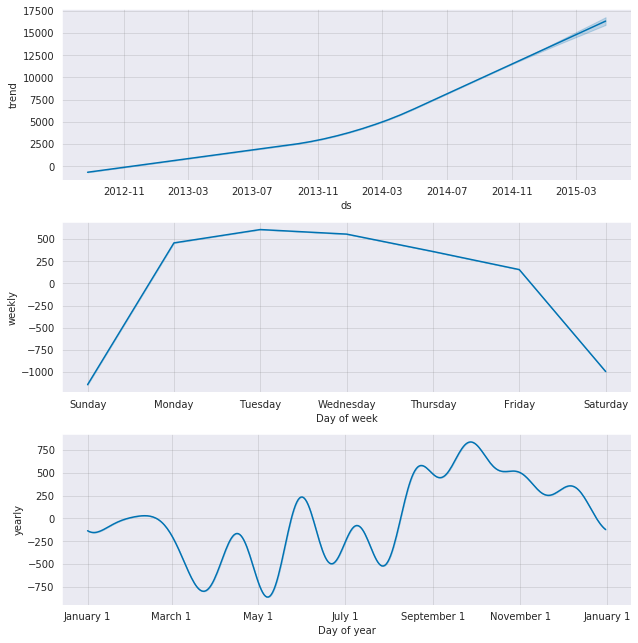

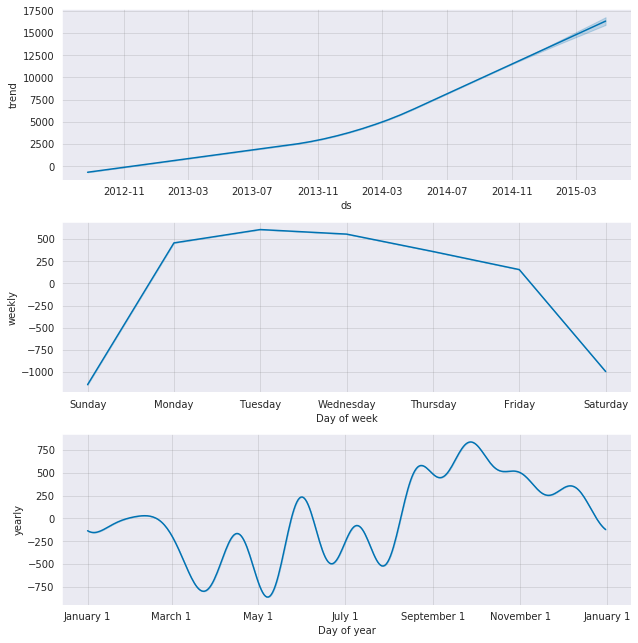

In [94]:
m.plot_components(forecast)

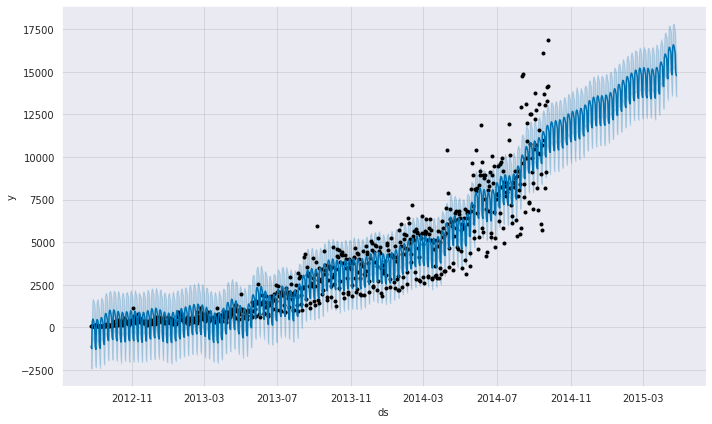

In [97]:
m.plot(forecast)
plt.show()

In [111]:
forecast['weekly'][500:501]

500    607.897821
Name: weekly, dtype: float64

In [109]:
int(forecast['weekly'][:1])

-994

In [ ]:
arra

In [168]:
preds = [np.array(hourly_frac) * int(forecast[762:].reset_index(drop = True)['weekly'][i]) for i in range(len(forecast[762:]))]

In [169]:
prediction = list(np.array(preds).flatten())

In [170]:
len(prediction)

5112

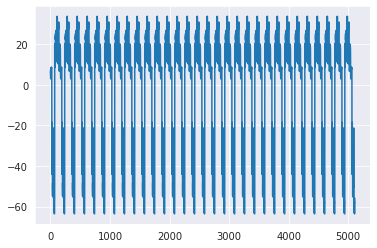

In [175]:
plt.plot(pd.DataFrame({'date': test['Datetime'], 'count': prediction}))

In [ ]:
pd.DataFrame(columns=['Date','Counts'], data = pd.)